In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [79]:
n = 500
d = 1000
k = 100
sigma = 1

#make w array
w = np.zeros(d)
for j in range(k):
    w[j] = j/k
    

x = np.random.normal(size=(n, d))
y = w @ x.T + np.random.normal(0, sigma, size=(n))

print("x shape", x.shape)
print("y shape", y.shape)

x shape (500, 1000)
y shape (500,)


In [91]:
def CDA(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.ones((1,d))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - w@x.T)
        for k in range(d):
            ak = 2 * np.linalg.norm(x[:,k])**2
            ck = 0
            for i in range(n):
                summation = 0
                for j in range(d):
                    if j !=k:
                        summation += w[0,j] * x[i,j]
                ck += 2* x[i, k]*(y[i] - (b + summation)) 

            if(ck < -lam):
                w[0, k] = (ck+lam)/ak
            elif (ck>lam):
                w[0, k] = (ck-lam)/ak
            else:
                w[0, k] = 0
                
                
        #Check if converged
        diff = np.max(np.abs(w - w_prev))
        print("diff = ", np.max(np.abs(w - w_prev)))
        if( np.max(np.abs(w - w_prev)) < delta):
            return w
        if(count > 100):
            print("count stopped it")
            return w
        count += 1
        
        w_prev = np.copy(w)
        
def CDA_better(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.zeros((d,))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - w@x.T)
        a = 2*np.sum(np.abs(x)**2,axis=0)
        for k in range(d):
            x_new = np.append(x[:,:k], x[:,k+1:], axis = 1)
            w_new = np.append(w[:k], w[k+1:])
            ck = 2 * np.sum(x[:,k] @ (y - (b + w_new@x_new.T)))
            if(ck < -lam):
                w[k] = (ck+lam)/(a[k])
            elif (ck>lam):
                w[k] = (ck-lam)/(a[k])
            else:
                w[k] = 0
                
        #Check if converged
        diff = np.max(np.abs(w - w_prev))
        if count % 100 == 0:
            print("count = ", count)
            print("diff = ", np.max(np.abs(w - w_prev)))
        if( np.max(np.abs(w - w_prev)) < delta):
            print("count = ", count)
            return w
        count += 1
        
        w_prev = np.copy(w)

In [74]:
def find_lam_max(x, y, d):
    lam_max_list = np.zeros(d)
    for k in range(d):
        summation = 0
        for i in range(n):
            summation += x[i,k] * (y[i] - np.mean(y))*2
        lam_max_list[k] = summation
    return np.max(lam_max_list)


In [83]:
def FDR(w, k):
    #true w has zero from k +1 to end
    try:
        return np.count_nonzero(w[(k+1):])/np.count_nonzero(w)
    except:
        return 0

def TPR(w, k):
    #true w has zero from k +1 to end
    return np.count_nonzero(w[:k])/k

In [105]:

scale_fac = 1.5
num_nonzero_list = []
lam_list = []
FDR_list = []
TPR_list = []


lam = find_lam_max(x, y, d)

i = 0
num_nonzero = 0
while num_nonzero <= (d-5):
    print(i)
    i += 1
    w = CDA_better(x, y, lam, delta = 1e-3)
#     w = CDA(x, y, lam)
    num_nonzero= np.count_nonzero(w)
    num_nonzero_list.append(num_nonzero)
    FDR_list.append(FDR(w, k))
    TPR_list.append(TPR(w, k))
    lam_list.append(lam)
    lam = lam/scale_fac
    
    print("num_nonzero_list = ", num_nonzero_list)
    print("FDR_list = ", FDR_list)
    print("TPR_list = ", TPR_list)
    print("lam_list = ", lam_list)


0
count =  0
diff =  0.0
count =  0
num_nonzero_list =  [0]
FDR_list =  [0]
TPR_list =  [0.0]
lam_list =  [1473.5412953176701]
1
count =  0
diff =  0.43195131220866073
count =  3
num_nonzero_list =  [0, 9]
FDR_list =  [0, 0.0]
TPR_list =  [0.0, 0.09]
lam_list =  [1473.5412953176701, 982.3608635451134]
2
count =  0
diff =  0.6348933346762579
count =  4
num_nonzero_list =  [0, 9, 32]
FDR_list =  [0, 0.0, 0.09375]
TPR_list =  [0.0, 0.09, 0.29]
lam_list =  [1473.5412953176701, 982.3608635451134, 654.907242363409]
3
count =  0
diff =  0.7147601659501772
count =  5
num_nonzero_list =  [0, 9, 32, 60]
FDR_list =  [0, 0.0, 0.09375, 0.11666666666666667]
TPR_list =  [0.0, 0.09, 0.29, 0.53]
lam_list =  [1473.5412953176701, 982.3608635451134, 654.907242363409, 436.6048282422726]
4
count =  0
diff =  0.7701496414042106
count =  7
num_nonzero_list =  [0, 9, 32, 60, 85]
FDR_list =  [0, 0.0, 0.09375, 0.11666666666666667, 0.16470588235294117]
TPR_list =  [0.0, 0.09, 0.29, 0.53, 0.71]
lam_list =  [1473.5

count =  0
diff =  0.9471285178343463
count =  100
diff =  0.002070336285847546
count =  173
num_nonzero_list =  [0, 9, 32, 60, 85, 107, 137, 176, 225, 279, 342, 387, 425, 460, 485, 519, 542, 557]
FDR_list =  [0, 0.0, 0.09375, 0.11666666666666667, 0.16470588235294117, 0.2616822429906542, 0.3795620437956204, 0.5113636363636364, 0.6, 0.6738351254480287, 0.7339181286549707, 0.7622739018087855, 0.7835294117647059, 0.7956521739130434, 0.8082474226804124, 0.8208092485549133, 0.8247232472324724, 0.8312387791741472]
TPR_list =  [0.0, 0.09, 0.29, 0.53, 0.71, 0.79, 0.85, 0.86, 0.9, 0.91, 0.91, 0.92, 0.92, 0.94, 0.93, 0.93, 0.95, 0.94]
lam_list =  [1473.5412953176701, 982.3608635451134, 654.907242363409, 436.6048282422726, 291.0698854948484, 194.04659032989892, 129.36439355326596, 86.24292903551064, 57.49528602367376, 38.33019068244918, 25.553460454966118, 17.035640303310746, 11.357093535540498, 7.571395690360332, 5.047597126906888, 3.365064751271259, 2.2433765008475057, 1.4955843338983372]
18
co

In [103]:
print("num_nonzero_list = ", num_nonzero_list)
print("FDR_list = ", FDR_list)
print("TPR_list = ", TPR_list)
print("lam_list = ", lam_list)

num_nonzero_list =  [0, 9, 32, 60, 85, 107, 137, 176, 226, 280, 345, 386, 425, 452, 492, 524, 573, 590, 622, 676, 691, 827, 997]
FDR_list =  [0, 0.0, 0.09375, 0.11666666666666667, 0.16470588235294117, 0.2616822429906542, 0.3795620437956204, 0.5113636363636364, 0.6017699115044248, 0.675, 0.736231884057971, 0.7616580310880829, 0.7858823529411765, 0.8008849557522124, 0.8089430894308943, 0.8206106870229007, 0.8342059336823735, 0.8389830508474576, 0.8456591639871383, 0.8594674556213018, 0.8610709117221418, 0.8778718258766627, 0.8986960882647944]
TPR_list =  [0.0, 0.09, 0.29, 0.53, 0.71, 0.79, 0.85, 0.86, 0.9, 0.91, 0.91, 0.92, 0.91, 0.9, 0.94, 0.94, 0.95, 0.95, 0.96, 0.95, 0.96, 1.0, 1.0]
lam_list =  [1473.5412953176701, 982.3608635451134, 654.907242363409, 436.6048282422726, 291.0698854948484, 194.04659032989892, 129.36439355326596, 86.24292903551064, 57.49528602367376, 38.33019068244918, 25.553460454966118, 17.035640303310746, 11.357093535540498, 7.571395690360332, 5.047597126906888, 3.36

[1473.5412953176701, 982.3608635451134, 654.907242363409, 436.6048282422726, 291.0698854948484, 194.04659032989892, 129.36439355326596, 86.24292903551064, 57.49528602367376, 38.33019068244918, 25.553460454966118, 17.035640303310746, 11.357093535540498, 7.571395690360332, 5.047597126906888, 3.365064751271259, 2.2433765008475057, 1.4955843338983372, 0.9970562225988915, 0.664704148399261, 0.4431360989328406, 0.2954240659552271, 0.19694937730348472]
[0, 9, 32, 60, 85, 107, 137, 176, 225, 279, 342, 387, 425, 460, 485, 519, 542, 557, 620, 685, 750, 827, 997]


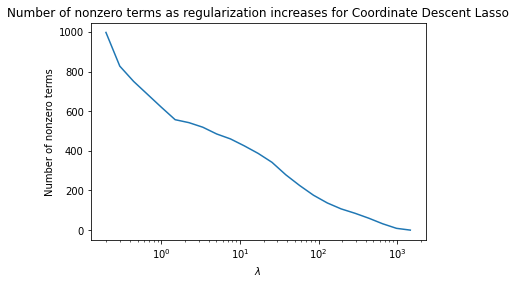

In [106]:

print(lam_list)
print(num_nonzero_list)
plt.plot(lam_list, num_nonzero_list)
plt.xlabel(r'$\lambda$')
plt.ylabel('Number of nonzero terms')
plt.title('Number of nonzero terms as regularization increases for Coordinate Descent Lasso')
plt.xscale('log')

Text(0.5, 1.0, 'false discovery rate vs true positive rate for Lasso')

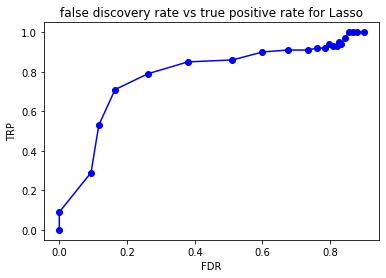

In [107]:
plt.plot(FDR_list, TPR_list, 'b')
plt.plot(FDR_list, TPR_list, 'ob')
plt.xlabel("FDR")
plt.ylabel("TRP")
plt.title('false discovery rate vs true positive rate for Lasso')
# plt.xscale('log')